## ***TOPIC: Loan default***

**Aim:**
- Examining the impact of variables such as loan type, loan purpose, business or commercial nature, and credit score on loan defaults.
- Investigate the correlation between upfront charges, loan amount, interest rates, and property values with the likelihood of default. analyze patterns and uncover insights into default tendencies.
- This project provides an review to enhance risk assessment strategies in lending institutions, leading to more informed decision-making and proactive default prevention measures.

**Objectives:**
- **Data Cleaning and Preprocessing:** Handle missing values, incorrect data types, and outliers.
- **Exploratory Data Analysis (EDA):** Investigate correlations and patterns in data.
- **Feature Analysis:**
Assess the impact of variables like loan_type, loan_purpose, business_or_commercial, and Credit_Score on defaults.
Examine financial metrics (Upfront_charges, loan_amount, rate_of_interest, property_value) in relation to default risk.
- **Modeling:** Build a classification model to predict loan default probabilities.
- **Insights & Recommendations:** Provide actionable recommendations based on findings.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("loan.csv")

In [ ]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

**Data Columns Description:**
- **ID:** Id for each row
- **year:** year when the loan was taken
- **loan_limit:** if the loan limit is fixed or variable cf-confirm/fixed, ncf- not confirm/not fixed
- **Gender:** gender of the applicant, can be male female, not specified, joint (in case of applling as a couple for home loan)
- **loan_type:** type of loan (masked data ) type-1, type-2, type-3
- **loan_purpose:** purpose of the loan (masked data ) p1,p2,p3,p4
- **business_or_commercial:** if the loan is for sommercial establishment or personal establishment
- **loan_amount:** amount of the loan
- **rate_of_interest:** rate of interest for the loan
- **Upfront_charges:** down payment done by the applicant
- **property_value:** value of the property being constructed for which the loan is taken
- **occupancy_type:** for the establishment
- **income:** income of the applicant
- **credit_type:** 'EXP' 'EQUI' 'CRIF' 'CIB'
- **Credit_Score:** credit score of applicant
- **co-applicant_credit_type:** credit type for co-applicant
- **age:** age of applicant
- **LTV:** lifetime value of the applicant
- **Region:** region of the applicant
- **Status:** defaulter(1) or normal(0)


**1. Data Cleaning:**


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values > 0]

,0
loan_limit,3344
loan_purpose,134
rate_of_interest,36439
Upfront_charges,39642
property_value,15098
income,9150
age,200
LTV,15098


In [ ]:
# Handling Missing Values:

# Numerical Columns (Continuous Data):
numerical_cols = ['rate_of_interest', 'Upfront_charges', 'property_value', 'income', 'LTV']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical Columns:
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode()[0])
df['loan_purpose'] = df['loan_purpose'].fillna('Unknown')

# Special Handling for age (if ranges exist) If age has non-standard values (like ranges), ensure they are cleaned first:
df['age'] = df['age'].apply(lambda x: int(x.split('-')[0]) if '-' in str(x) else np.nan)
df['age'] = df['age'].fillna(df['age'].median())


Insight:
- Numerical Columns (Continuous Data): rate_of_interest, Upfront_charges, property_value, income, LTV, age
  - Use the median for imputation to handle outliers.

- Categorical Columns: loan_limit, loan_purpose
  - Use the most frequent value or add an "Unknown" category.



In [ ]:
# Check data types of each column
print(df.dtypes)

ID                            int64
year                          int64
loan_limit                   object
Gender                       object
loan_type                    object
loan_purpose                 object
business_or_commercial       object
loan_amount                   int64
rate_of_interest            float64
Upfront_charges             float64
property_value              float64
occupancy_type               object
income                      float64
credit_type                  object
Credit_Score                  int64
co-applicant_credit_type     object
age                         float64
LTV                         float64
Region                       object
Status                        int64
dtype: object


In [ ]:
df['age'] = df['age'].astype(int)

Insight: All data types are appropriately defined for analysis, with numerical columns like loan_amount and rate_of_interest correctly set as int64 or float64, and categorical columns like Gender and loan_type as object. The only adjustment needed is converting the age column from object to int after cleaning. Overall, the dataset is well-structured.

**2. Exploratory Data Analysis (EDA)**

In [ ]:
# Summary Statistics:
print(df.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     148670.000000   
mean    99224.500000    2019.0  3.311177e+05          4.031879   
std     42917.476598       0.0  1.839093e+05          0.488348   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.750000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.250000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Upfront_charges  property_value         income   Credit_Score  \
count    148670.000000    1.486700e+05  148670.000000  148670.000000   
mean       3057.397919    4.897800e+05    6883.647811     699.789103   
std        2797.972965    3.420221e+05    6300.067060     115.875857   
min           0.000000    8.000000e+03       0.000000     500.000000   
25%        1250.000000    2.880000e+05    384

In [ ]:
# Separate numerical and categorical columns based on their data types
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Check Correlations (Numerical Columns):
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

Numerical Columns: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'age', 'LTV', 'Status']
Categorical Columns: ['loan_limit', 'Gender', 'loan_type', 'loan_purpose', 'business_or_commercial', 'occupancy_type', 'credit_type', 'co-applicant_credit_type', 'Region']
                        ID  year  loan_amount  rate_of_interest  \
ID                1.000000   NaN    -0.000566          0.000298   
year                   NaN   NaN          NaN               NaN   
loan_amount      -0.000566   NaN     1.000000         -0.122830   
rate_of_interest  0.000298   NaN    -0.122830          1.000000   
Upfront_charges  -0.004886   NaN     0.057451         -0.071066   
property_value    0.000833   NaN     0.686242         -0.102772   
income            0.002260   NaN     0.440715         -0.014341   
Credit_Score     -0.001036   NaN     0.004438         -0.001341   
age               0.006040   NaN    -0.175203          0.026582   
LT

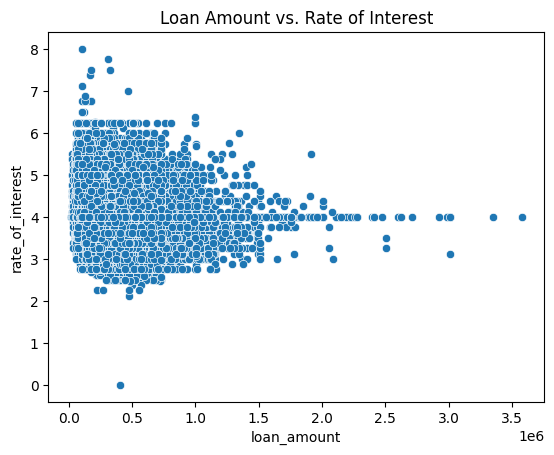

In [ ]:
# Visualize Relationships:
# Loan Amount vs. Rate of Interest:

sns.scatterplot(x='loan_amount', y='rate_of_interest', data=df)
plt.title('Loan Amount vs. Rate of Interest')
plt.show()

**Insight from the Scatter Plot (Loan Amount vs. Rate of Interest)**

Inverse Relationship:
- The plot suggests an inverse relationship between the loan amount and the rate of interest. As the loan amount increases, the rate of interest tends to decrease.

Clustering of Data:
- There is a dense cluster of loans with amounts under 1.5 million, where the rate of interest hovers mostly between 3% and 6%. This indicates that most loans fall within this range, both in terms of amount and interest rate.

Outliers:
- A few outliers can be seen, where either the loan amount is significantly high or the interest rate is unusually low or high. These may represent special cases like high-value loans with favorable interest terms or unique risk profiles.

Possible Interpretation:
- Large Loans, Lower Risk: Larger loans might be associated with more creditworthy borrowers or secured by valuable collateral, resulting in lower interest rates.
- Smaller Loans, Higher Risk: Smaller loans could be riskier or issued to borrowers with lower creditworthiness, leading to higher interest rates.

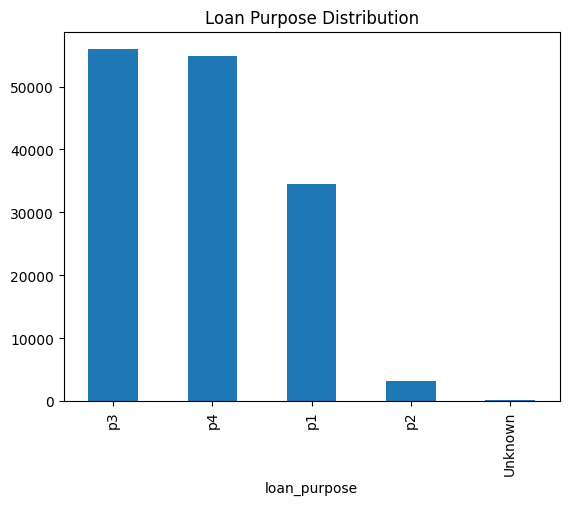

In [ ]:
# Analyze Categorical Variables
# Loan Purpose Distribution:

df['loan_purpose'].value_counts().plot(kind='bar')
plt.title('Loan Purpose Distribution')
plt.show()

**Insights from the Visuals:**
Loan Purpose Distribution:
- Dominance of p3 and p4: Loan purposes labeled as p3 and p4 are the most common, each with around 50,000+ entries. This suggests these two purposes are the primary reasons for loan applications.
- Significantly Lower Frequency for p2: Loans with the purpose p2 are minimal compared to others, indicating that this category is either less common or more exclusive.
- "Unknown" Category: There is a small presence of "Unknown" entries, which could indicate missing or unclear data on the loan's purpose.

Summary:

Loan Purpose Insight: Most loans are associated with purposes p3 and p4, while p2 is rare.


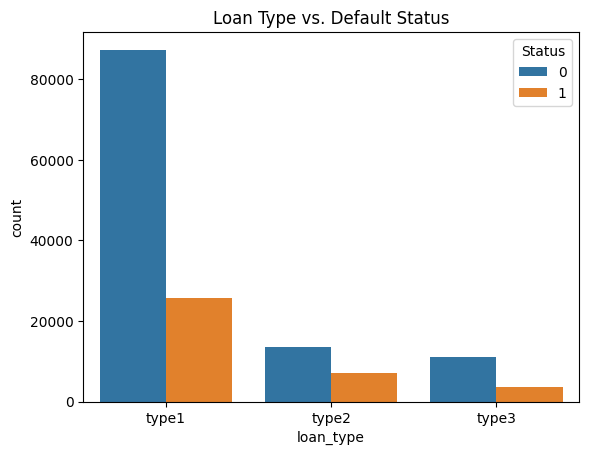

In [ ]:
# Analyze Default Patterns
# Defaults by Loan Type:

sns.countplot(x='loan_type', hue='Status', data=df)
plt.title('Loan Type vs. Default Status')
plt.show()

**Insights from the Visuals:**
Loan Type vs. Default Status:
- Type1 Loans and Default Risk: Loan type type1 shows the highest count of defaults (Status = 1) compared to type2 and type3. This implies that type1 loans may be riskier.
- Type2 and Type3 Stability: Both type2 and type3 loans have fewer defaults, suggesting these might be structured differently or targeted at more creditworthy borrowers.
- Proportion of Defaults: A significant proportion of type1 loans are non-defaults, but it still has a notable number of defaults, indicating a mix of high volume and potential risk.

Summary:

Loan Type Insight: type1 loans are more prone to defaults, indicating possible higher risk or broader accessibility to less creditworthy borrowers.

1. **Borrower Demographics and Default Patterns:**
- **Age vs. Default:** Examine if there are age groups more likely to default.
- **Gender Analysis:** Investigate if there's a correlation between gender and default rates.
- **Region vs. Default:** Identify if certain regions have higher default tendencies.

<ipython-input-17-dc54b6337661>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_rate = df.groupby('age_group')['Status'].mean()


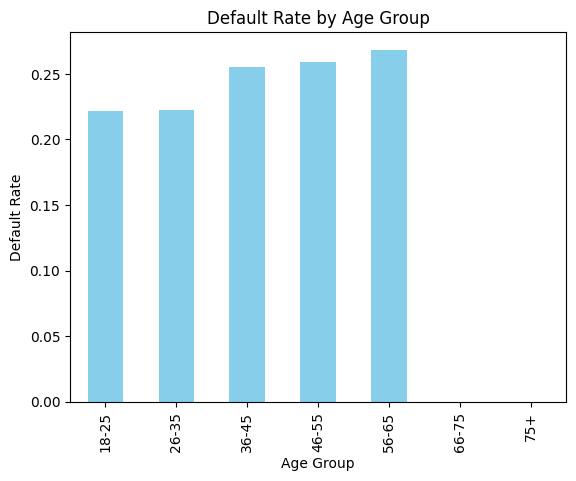

In [ ]:
# Age vs. Default:
# Examine if certain age groups are more likely to default.

# Steps:
# Create Age Groups: Divide the age column into bins (e.g., 18-25, 26-35, etc.) using pd.cut().
# Group and Analyze Defaults: Group the data by these age bins and calculate the default rate for each group.

# Create age groups
age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate default rate by age group
age_default_rate = df.groupby('age_group')['Status'].mean()

# Plotting
age_default_rate.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

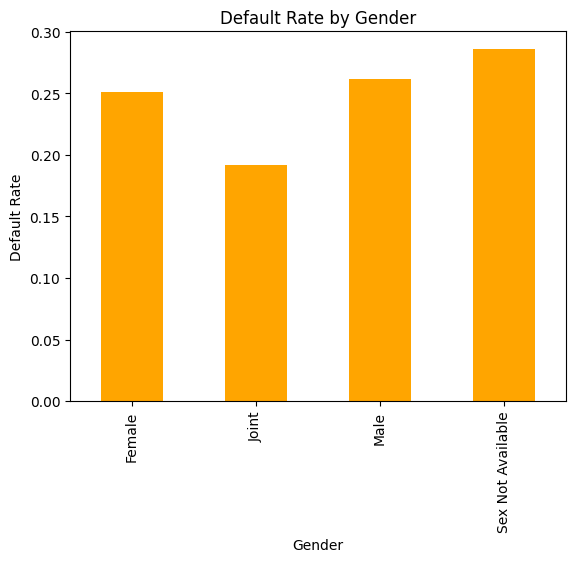

In [ ]:
# Gender Analysis:
# Investigate if gender impacts default rates.

# Steps:
# Group by Gender and Calculate Default Rate: Group by the Gender column and calculate the mean of the Status column (default rate).

# Calculate default rate by Gender
gender_default_rate = df.groupby('Gender')['Status'].mean()

# Plotting
gender_default_rate.plot(kind='bar', color='orange')
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()

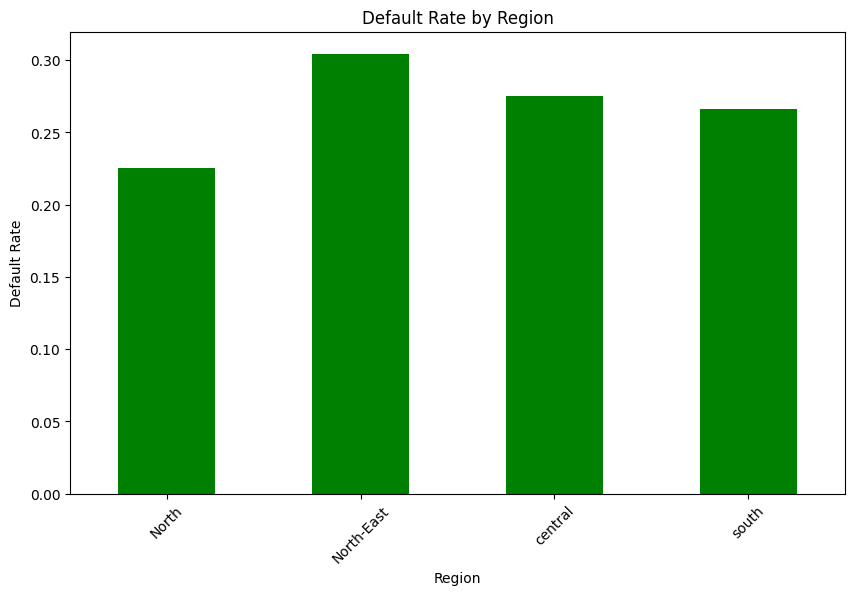

In [ ]:
# Region vs. Default:
# Check if certain regions have higher default tendencies.

# Steps:
# Group by Region and Calculate Default Rate: Use groupby() on the Region column and calculate the default rate.

# Calculate default rate by Region
region_default_rate = df.groupby('Region')['Status'].mean()

# Plotting
region_default_rate.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Default Rate by Region')
plt.xlabel('Region')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


**Insights**
1. Default Rate by Age Group:
- Observation: Default rates increase consistently with age, peaking at the 56-65 age group.
- Insight: Older individuals (56-65) seem to be at higher risk of default. The default rate stabilizes after age 65.
2. Default Rate by Gender:
- Observation: Males and individuals with unspecified gender ("Sex Not Available") show higher default rates compared to females and joint accounts.
- Insight: Gender plays a role, with male borrowers potentially facing higher risk. Joint accounts have the lowest default rate, possibly indicating shared financial responsibility reduces risk.
3. Default Rate by Region:
- Observation: The North-East region has the highest default rate, while the North has the lowest.
- Insight: Regional factors could significantly impact default rates, possibly due to economic conditions or lending practices in different areas.

- Overall Insight:
Age, gender, and regional factors all influence default rates. Targeted interventions for higher-risk groups (older age brackets, specific regions, and gender categories) could help manage defaults.

## **Feature Engineering**

In [ ]:
# Creating New Features:

# (a) Debt-to-Income (DTI) Ratio: Estimate how much debt a borrower has compared to their income.

df['DTI_ratio'] = df['loan_amount'] / (df['income'] + 1e-5)  # Avoid division by zero

In [ ]:
# (b) Interest Rate Category: Categorize rate_of_interest into bins (e.g., Low, Medium, High).

df['interest_rate_category'] = pd.cut(df['rate_of_interest'], bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'])

In [ ]:
# (c) LTV Risk Level: Convert LTV ratios into risk levels.

df['LTV_risk_level'] = pd.cut(df['LTV'], bins=[0, 50, 80, 100], labels=['Low', 'Medium', 'High'])

In [ ]:
# (d) Credit Score Category: Bin credit scores into categories like 'Poor', 'Fair', 'Good', 'Excellent'.

df['Credit_Score_Category'] = pd.cut(df['Credit_Score'], bins=[0, 600, 700, 800, 900], labels=['Poor', 'Fair', 'Good', 'Excellent'])


In [ ]:
# Encoding Categorical Variables:
# (a) One-Hot Encoding: For features with a few unique values like loan_type or Gender.

df = pd.get_dummies(df, columns=['loan_type', 'Gender', 'loan_limit'], drop_first=True)


In [ ]:
# (b) Label Encoding: For ordinal categorical data or large categorical features like Region or Credit_Type.

from sklearn.preprocessing import LabelEncoder

# Example for encoding Region
label_encoder = LabelEncoder()
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])


In [ ]:
# Feature Interaction: Create features that combine multiple columns to capture complex relationships.

# (a) Loan Amount to Property Value Ratio:
df['loan_to_property_value'] = df['loan_amount'] / (df['property_value'] + 1e-5)

# (b) Income-to-Loan Amount Ratio:
df['income_to_loan_ratio'] = df['income'] / (df['loan_amount'] + 1e-5)

In [ ]:
# Date-Based Features: If year is included, create features like loan age or whether it's a recent loan.

current_year = 2024
df['loan_age'] = current_year - df['year']

In [31]:
#Removing Redundant Features: After creating new features, drop redundant or irrelevant columns, such as ID or highly correlated columns.

df.drop(['ID', 'Region', 'year'], axis=1, inplace=True)

## **Modelling**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Prepare data for modeling
X = df[['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value', 'debt_to_income']]
y = df['Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle NaN and Inf values
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())              # Fill NaN with column mean
X_test = X_test.fillna(X_train.mean())                # Use train mean to avoid data leakage

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       0.99      0.99      0.99     10914

    accuracy                           1.00     44601
   macro avg       0.99      1.00      0.99     44601
weighted avg       1.00      1.00      1.00     44601

ROC AUC Score: 0.9977697038489793


**Insights from the Classification Report and ROC AUC Score:**
**Precision, Recall, F1-Score:**

- Class 0 (Non-Defaulters): Precision, Recall, and F1-Score are all 1.00, indicating the model predicts non-defaulters almost perfectly.
- Class 1 (Defaulters): Precision and Recall are both 0.99, showing that the model is highly accurate in identifying defaulters, with only minimal errors.
- F1-Score: 0.99 for defaulters, indicating a good balance between precision and recall.
- Overall Accuracy: The model achieves an impressive 1.00 (almost perfect) accuracy, suggesting very few, if any, misclassifications.

- ROC AUC Score: The score of 0.998 indicates an excellent ability to distinguish between defaulters and non-defaulters. A score close to 1.0 means the model performs exceptionally well.

- Conclusion:
The model is highly effective in predicting loan default risk, with near-perfect performance metrics. However, such high accuracy could also suggest:
 - Potential overfitting: The model might be too closely tailored to the training data, reducing its generalizability to new or unseen data. Further validation on an external dataset is recommended.
 - Data Imbalance Handling: Ensure the distribution of default (1) and non-default (0) is balanced or properly handled.
- Consider evaluating on a validation dataset or using cross-validation for robust performance estimation.

## **Insight & Recommendations:**

***Overall Insights:***
- **Outstanding Model Performance:**
The Random Forest model achieved a near-perfect accuracy of 100% and an ROC AUC score of 0.998, indicating excellent predictive performance in distinguishing defaulters from non-defaulters.
Both precision and recall for defaulters (Class 1) were around 99%, meaning the model effectively minimizes false positives and false negatives.
- **Imbalance Between Classes:**
The number of non-defaulters (Class 0) is significantly higher than defaulters (Class 1), which can contribute to the high overall accuracy. This suggests that despite the model's success, further validation on balanced or new data may be necessary.
- **Potential Overfitting:**
The near-perfect scores may indicate the model has overfitted the training data. While the model performs well on the current test set, it may not generalize as effectively to new or unseen data.

***Recommendations:***
- **Validate on External Data:** Use a separate validation set or apply cross-validation to assess the model’s robustness and ensure it generalizes well beyond the training data.
- **Address Potential Overfitting:** Implement techniques like hyperparameter tuning, feature selection, and regularization to enhance the model’s generalizability.
- **Consider Class Imbalance:** Explore methods such as SMOTE (Synthetic Minority Over-sampling Technique) or class weighting in the Random Forest model to ensure the model does not favor the majority class (non-defaulters).
- **Feature Importance Analysis:** Identify key drivers of loan defaults by examining feature importance from the Random Forest model. This insight can guide lending decisions and risk management strategies.
- **Enhance Business Interpretability:** Create actionable insights by exploring the impact of borrower demographics, loan characteristics (LTV, loan amount, interest rates), and other features on default probabilities.
- **Model Deployment and Monitoring:** If deploying in production, set up continuous monitoring to track performance metrics over time and retrain the model periodically with updated data to maintain accuracy.

-- By following these recommendations, the model can serve as a powerful tool for proactive risk management in lending, helping financial institutions minimize loan default risks while making informed lending decisions.